In [1]:
import numpy as np
from scipy.stats import ttest_rel

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('white')

In [3]:
masked_ems = np.array([
    26.2, 37.0, 48.8, 48.8, 33.1, 38.7, 47.6, 47.6,
    26.1, 36.9, 48.3, 43.2, 32.9, 38.8, 47.5, 44.0,
    25.8, 36.5, 47.9, 26.7, 32.5, 38.1, 46.7, 33.4,
    25.7, 36.3, 48.7, 51.8, 33.2, 38.4, 47.7, 50.1,
    26.1, 36.8, 48.4, 43.5, 33.2, 38.9, 47.4, 44.6,
    25.8, 36.4, 47.5, 26.7, 32.7, 38.4, 46.6, 33.4,
    25.9, 36.5, 47.9, 47.8, 32.8, 38.2, 47.5, 47.9,
    26.1, 36.5, 47.8, 41.3, 32.8, 38.3, 47.4, 43.0,
    25.8, 36.5, 47.7, 26.9, 32.3, 37.9, 46.3, 33.2,
    25.9, 36.8, 48.4, 31.9, 32.8, 38.1, 47.0, 35.3,
])
full_ems = np.array([
    26.3, 36.5, 48.4, 48.4, 33.1, 38.6, 47.8, 47.8,
    26.2, 36.8, 48.4, 43.1, 33.1, 38.6, 47.2, 44.1,
    25.5, 36.5, 48.0, 26.5, 33.0, 38.4, 46.8, 33.6,
    25.9, 36.6, 48.4, 51.2, 32.9, 38.8, 47.5, 49.6,
    26.0, 36.8, 48.3, 43.6, 33.1, 38.9, 47.4, 44.8,
    26.2, 36.8, 48.2, 26.6, 33.3, 38.7, 47.2, 33.3,
    26.5, 36.8, 48.7, 47.7, 33.2, 38.6, 47.8, 47.8,
    26.4, 37.0, 48.7, 41.5, 33.3, 38.8, 47.8, 43.4,
    25.7, 36.5, 48.1, 26.9, 33.3, 38.7, 47.1, 33.3,
    26.2, 36.8, 48.3, 32.2, 33.1, 38.5, 47.6, 36.0,
])
deltas = masked_ems - full_ems

In [6]:
ttest_rel(masked_ems, full_ems, alternative='less')

TtestResult(statistic=np.float64(-4.287046211683118), pvalue=np.float64(2.5356889472356374e-05), df=np.int64(79))

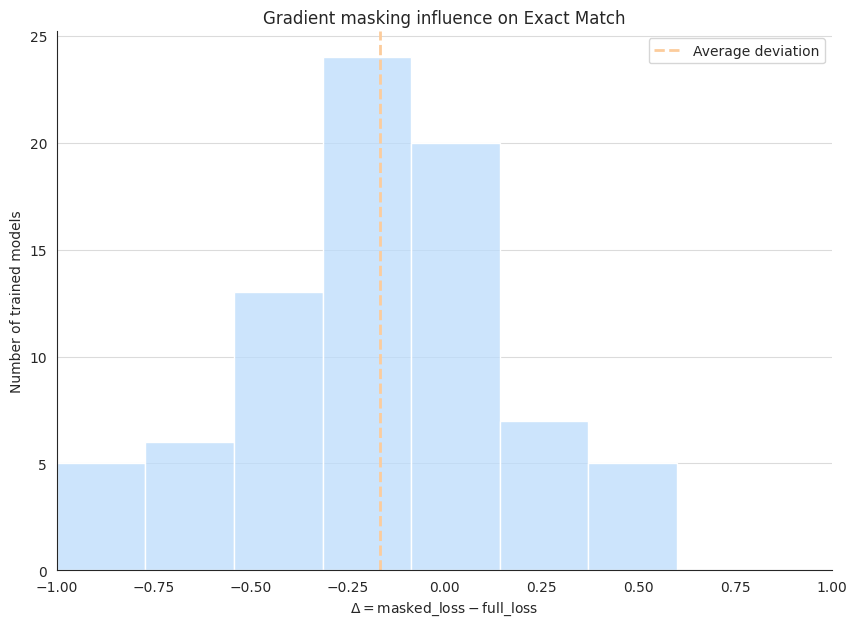

In [8]:
_, ax = plt.subplots(figsize=(10, 7))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.histplot(deltas,
             bins=7,
             color='#bcdcfc',
             ax=ax)
ax.set_title('Gradient masking influence on Exact Match')
ax.set_xlabel('$\Delta = {\mathrm{masked\_loss} - \mathrm{full\_loss}}$')
ax.set_ylabel('Number of trained models')
mean_line = ax.axvline(x=deltas.mean(), color='#fccc9c', linestyle='--', linewidth=2)
ax.legend([mean_line], ['Average deviation'], loc='upper right')

ax.set_xlim((-1, 1))
ax.grid(axis='y', alpha=0.7)

plt.savefig('centered-gradient-masking.png', dpi=300, bbox_inches='tight')
plt.savefig('centered-gradient-masking.svg', format='svg', bbox_inches='tight')